# Lab 2 (25.10.19)

In [79]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline 
plt.style.use('seaborn-white')

## 1.

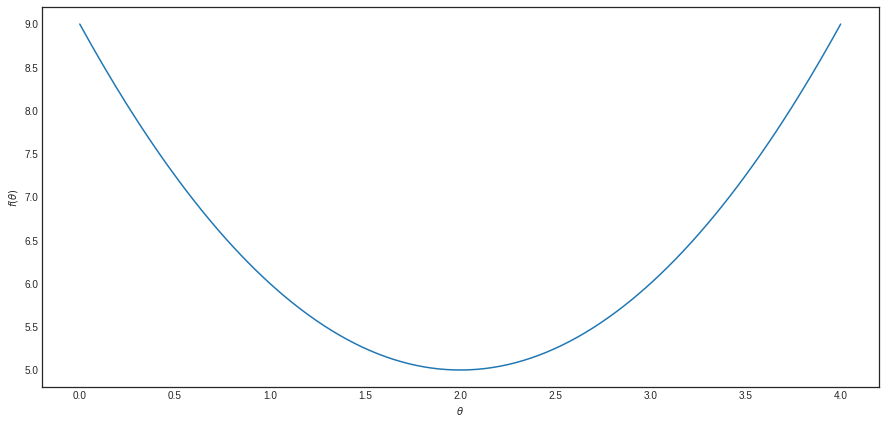

In [43]:
f = lambda theta: (theta-2)**2 +5
limit = (0,4)
steps = 200
domain = np.linspace(limit[0], limit[1], steps)

plt.figure(figsize=(15,7))
plt.plot(domain, list(map(f,domain)))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.show();

1. What’s the gradient of our function $f$ ? Define a gradient function $g$ and plot it.

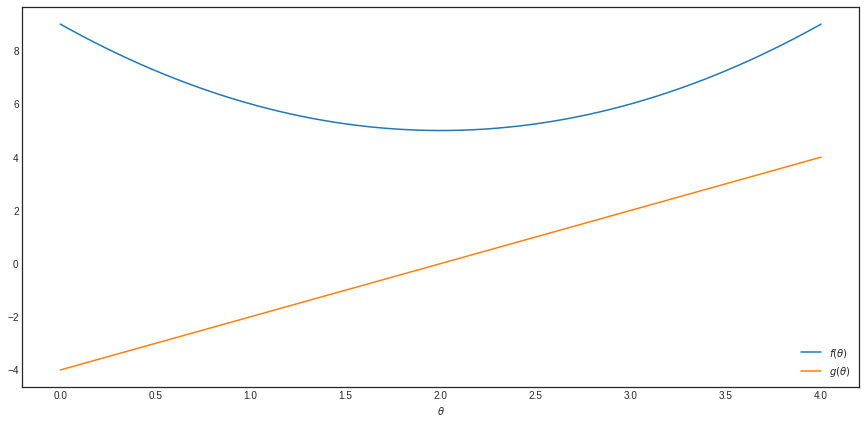

In [44]:
g = lambda theta: 2*(theta-2)
plt.figure(figsize=(15,7))
plt.plot(domain, list(map(f, domain)),
         domain, list(map(g, domain)))
plt.xlabel(r'$\theta$')
plt.legend([r'$f(\theta)$', r'$g(\theta)$'])
plt.show();

2. Assume a constant learning rate of $\lambda = .8$. Write down the general update step for gradient descent.

$\theta_{t+1}=\theta_t - \lambda*g(\theta_t)$

3. Implement gradient descent for minimizing $f$ making use of your defined gradient function $g$. Compute 20 iterations to find the $\theta$ that minimizes $f(\theta)$. Plot the sequence of $\theta_t$s against the iteration $t$. Start with $\theta_0 = 5$.

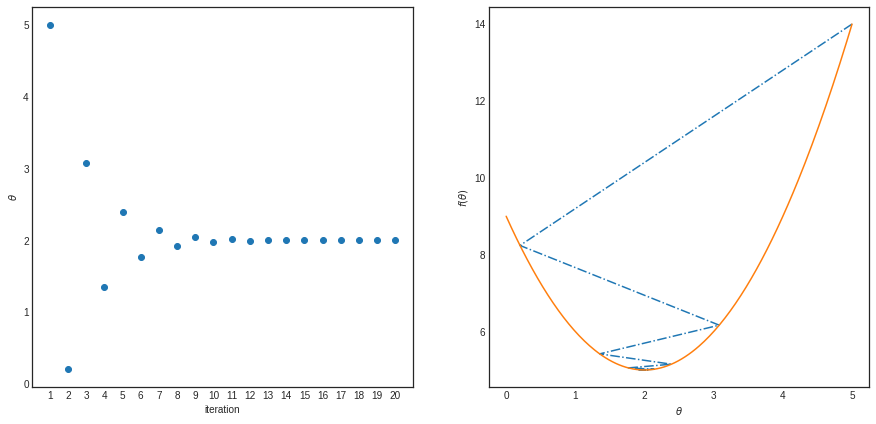

In [50]:
def update_step(theta, g, lambda_):
    return theta - lambda_*g(theta)

fs = []
thetas = []
theta = 5
steps=20
lambda_=0.8

for i in range(steps):
    if i==0:
        thetas.append(theta)
        fs.append(f(theta))
    else:
        theta = update_step(theta, g, lambda_)
        thetas.append(theta)
        fs.append(f(theta))

domain = np.linspace(np.floor(min(thetas)), np.ceil(max(thetas)), 200)
fig, axs = plt.subplots(1, 2, figsize=(15,7)) # Creating fig with 2 col, 1 rows
axs[0].scatter(np.arange(1,21), thetas)
axs[0].set_xlabel('iteration')
axs[0].set_xticks(np.arange(1,21))
axs[0].set_ylabel(r'$\theta$')
axs[1].plot(thetas, fs, linestyle='-.')
axs[1].plot(domain, list(map(f, domain)))
axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$f(\theta)$')
plt.show();

4. Replace the analytical gradient by a two-sided numerical approximation. This often occurs in practice when the analytical gradient is hard to compute. We will use a two-sided approximation such that
$$\hat{g}(\theta)=\frac{f(\theta +h)-f(\theta -h)}{2h}$$
and you can use the code below. Repeat part 3 using the numerical gradient.

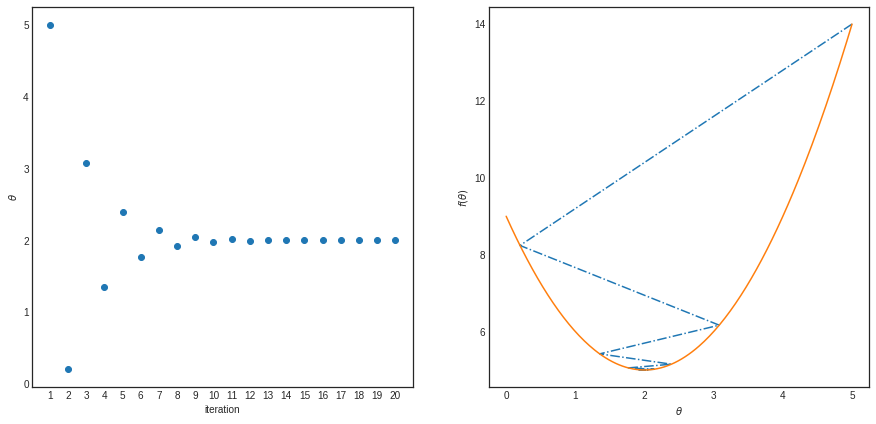

In [70]:
def g_hat(f, theta, h):
    return (f(theta+h)-f(theta-h))/2*h

def update_step_(theta, g, lambda_, f, h):
    return theta - lambda_*g(f, theta, h)

fs = []
thetas = []
theta = 5
steps=20
lambda_=0.8
h = 1

for i in range(steps):
    if i==0:
        thetas.append(theta)
        fs.append(f(theta))
    else:
        theta = update_step_(theta, g_hat, lambda_, f, h)
        thetas.append(theta)
        fs.append(f(theta))

domain = np.linspace(np.floor(min(thetas)), np.ceil(max(thetas)), 200)
fig, axs = plt.subplots(1, 2, figsize=(15,7)) # Creating fig with 2 col, 1 rows
axs[0].scatter(np.arange(1,steps+1), thetas)
axs[0].set_xlabel('iteration')
axs[0].set_xticks(np.arange(1,steps+1))
axs[0].set_ylabel(r'$\theta$')
axs[1].plot(thetas, fs, linestyle='-.')
axs[1].plot(domain, list(map(f, domain)))
axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$f(\theta)$')
plt.show();

## 2.

In [77]:
# Import data
path_to_data = '/home/j-a-h/research/ml-course/Lab2_Optimization.csv'
df = pd.read_csv(path_to_data, sep=';', index_col=0)

1. Plot LoanAmount against TimeToFund to get a sense of the relationship between these variables.

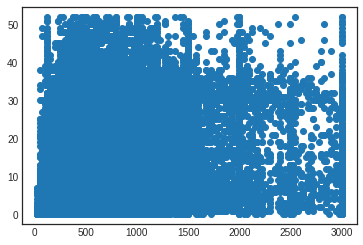

In [78]:
plt.scatter(df['LoanAmount'], df['TimeToFund'])
plt.show();

In [81]:
reg = smf.ols('TimeToFund ~ LoanAmount', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             TimeToFund   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     5345.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:50:32   Log-Likelihood:            -2.4732e+05
No. Observations:               65283   AIC:                         4.946e+05
Df Residuals:                   65281   BIC:                         4.947e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7077      0.067    115.418      0.0

2. Even though we know how to solve OLS in closed form, we want to use gradient descent to find the coefficients. The objective function can be defined as

In [82]:
def MSE(beta_0, beta_1, y, X):
    return np.sum((y - beta_0 - beta_1*X)**2)/len(y)


Plot the objective function (average loss) as a function of $\beta_1\in [0, .01]$, keeping $\beta_0$ fixed at 7.

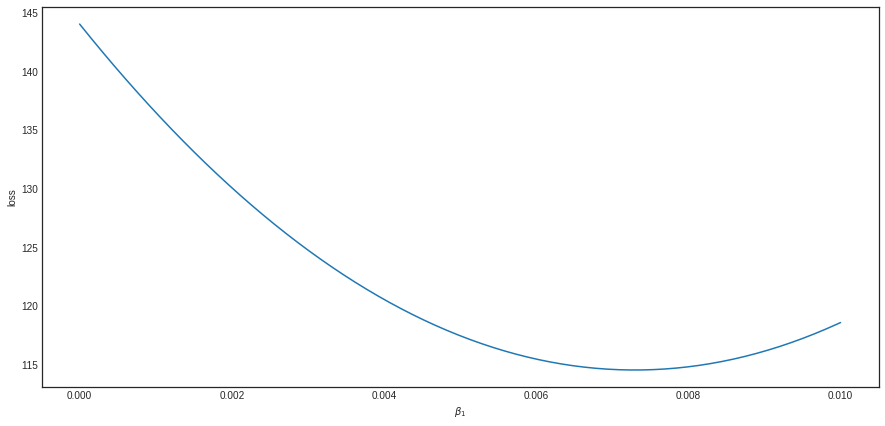

In [89]:
y = df['TimeToFund']
X = df['LoanAmount']
beta_0 = 7
beta_1s = np.linspace(0,0.01,200)
MSEs = []
for beta_1 in beta_1s:
    MSEs.append(MSE(beta_0, beta_1, y, X))

plt.figure(figsize=(15,7))
plt.plot(beta_1s, MSEs)
plt.xlabel(r'$\beta_1$')
plt.ylabel('loss')
plt.show();

3. What’s the analytical gradient of the objective function? Define a function that computes the gradient for given $\beta_0$, $\beta_1$.

In [90]:
def gradient_ols(beta_0, beta_1, y, X):
    grad_b0 = (2/len(y))*np.sum(beta_0+beta_1*X-y)
    grad_b1 = (2/len(y))*np.sum((beta_0+beta_1*X-y)*X)
    return np.array([grad_b0, grad_b1])

In [92]:
gradient_ols(5, 0.005, y, X)[0]

-7.222025642203943

4. Use that function to do gradient descent, starting at $\beta_0 = 5$ and $\beta_1 = .005$. Use a learning rate of $\lambda = .0001$ and 1000 iterations. Why does the algorithm yield NaNs for $\beta_0, \beta_1$?

In [131]:
beta_0 = 5
beta_1 = 0.005
lambda_ = 0.0001
steps = 1000
beta_1s = []
for i in range(steps):
    grad = gradient_ols(beta_0, beta_1, y, X)
    beta_0 = beta_0 - lambda_*grad[0]
    beta_1s.append(beta_1)
    beta_1 = beta_1 - lambda_*grad[1]
    
print(r'$\beta_0$:', beta_0, r'$\beta_1$:', beta_1)

/home/j-a-h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


$\beta_0$: -inf $\beta_1$: nan


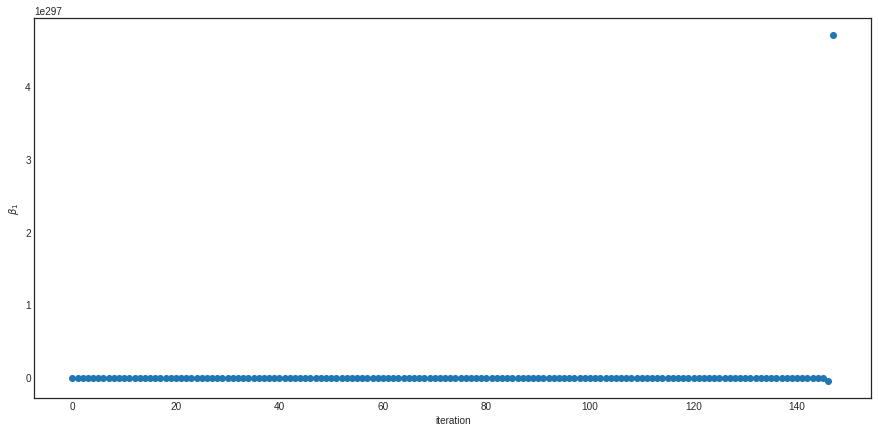

In [128]:
plt.figure(figsize=(15,7))
plt.scatter(np.arange(148), beta_1s[:148])
plt.xlabel('iteration')
plt.ylabel(r'$\beta_1$')
plt.show();

5. Does it help to change the learning rate?

In [133]:
beta_0 = 5
beta_1 = 0.005
lambda_ = 0.000001
steps = 1000
beta_0s = []
beta_1s = []
for i in range(steps):
    grad = gradient_ols(beta_0, beta_1, y, X)
    beta_0s.append(beta_0)
    beta_0 = beta_0 - lambda_*grad[0]
    beta_1s.append(beta_1)
    beta_1 = beta_1 - lambda_*grad[1]
    
print(r'$\beta_0$:', beta_0, r'$\beta_1$:', beta_1)

$\beta_0$: 5.00213022370035 $\beta_1$: 0.009387999816826862


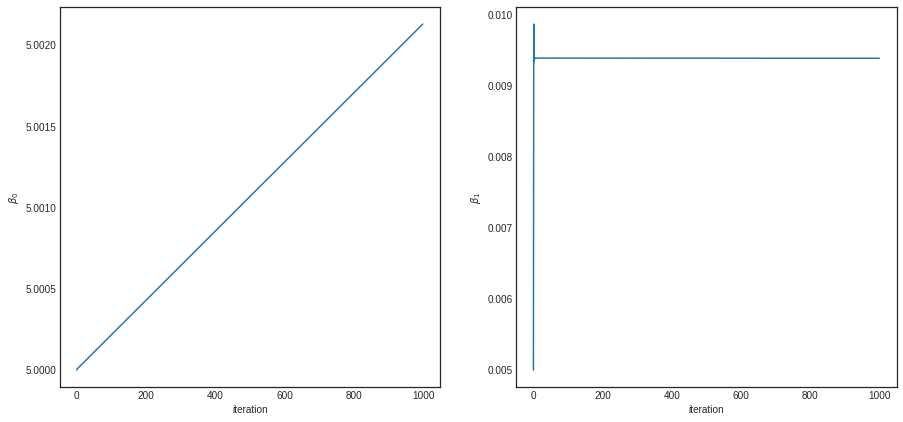

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(15,7)) # Creating fig with 2 col, 1 rows
axs[0].plot(np.arange(steps), beta_0s)
axs[0].set_ylabel(r'$\beta_0$')
axs[1].plot(np.arange(steps), beta_1s)
axs[1].set_ylabel(r'$\beta_1$')
for ax in axs:
    ax.set_xlabel('iteration')

6. What happens when we express LoanAmount in 1000USD terms rather than in raw dollar terms? Try a learning rate of $\lambda\in \{.1, .01\}$.

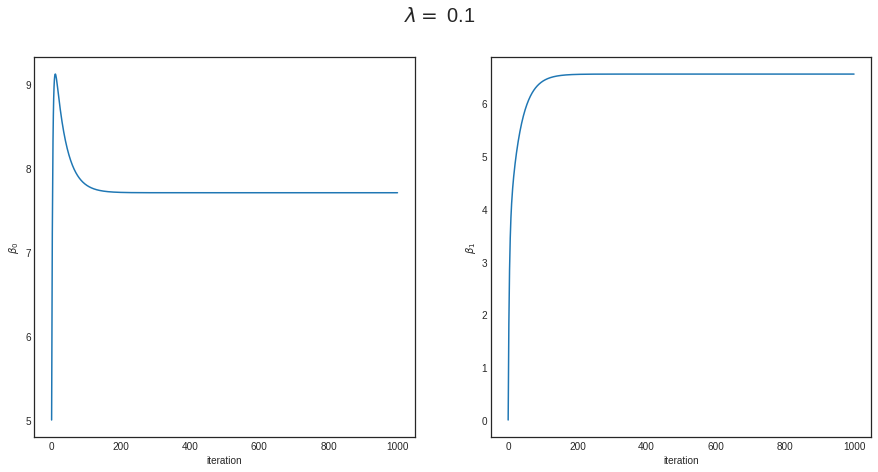

In [144]:
X = df['LoanAmount']/1000

beta_0 = 5
beta_1 = 0.005
lambda_ = 0.1
steps = 1000
beta_0s = []
beta_1s = []
for i in range(steps):
    grad = gradient_ols(beta_0, beta_1, y, X)
    beta_0s.append(beta_0)
    beta_0 = beta_0 - lambda_*grad[0]
    beta_1s.append(beta_1)
    beta_1 = beta_1 - lambda_*grad[1]
    
fig, axs = plt.subplots(1, 2, figsize=(15,7)) # Creating fig with 2 col, 1 rows
axs[0].plot(np.arange(steps), beta_0s)
axs[0].set_ylabel(r'$\beta_0$')
axs[1].plot(np.arange(steps), beta_1s)
axs[1].set_ylabel(r'$\beta_1$')
for ax in axs:
    ax.set_xlabel('iteration')
fig.suptitle(r'$\lambda =$ {}'.format(lambda_), fontsize=20)
plt.show();

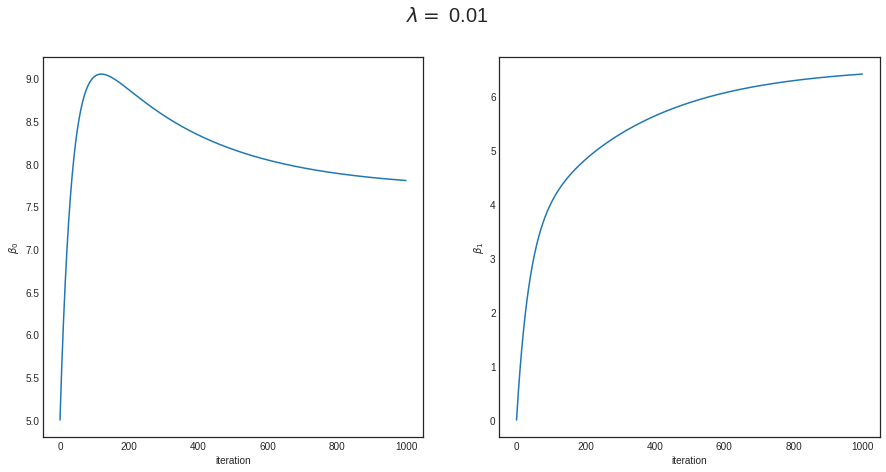

In [145]:
X = df['LoanAmount']/1000

beta_0 = 5
beta_1 = 0.005
lambda_ = 0.01
steps = 1000
beta_0s = []
beta_1s = []
for i in range(steps):
    grad = gradient_ols(beta_0, beta_1, y, X)
    beta_0s.append(beta_0)
    beta_0 = beta_0 - lambda_*grad[0]
    beta_1s.append(beta_1)
    beta_1 = beta_1 - lambda_*grad[1]
    
fig, axs = plt.subplots(1, 2, figsize=(15,7)) # Creating fig with 2 col, 1 rows
axs[0].plot(np.arange(steps), beta_0s)
axs[0].set_ylabel(r'$\beta_0$')
axs[1].plot(np.arange(steps), beta_1s)
axs[1].set_ylabel(r'$\beta_1$')
for ax in axs:
    ax.set_xlabel('iteration')
fig.suptitle(r'$\lambda =$ {}'.format(lambda_), fontsize=20)
plt.show();

7. (Bonus) How would you adjust your code to do stochastic gradient descent instead?

In [146]:
df = df.sample(frac=0.2, random_state=181)

In [147]:
X = df['LoanAmount']/1000
y = df['TimeToFund']

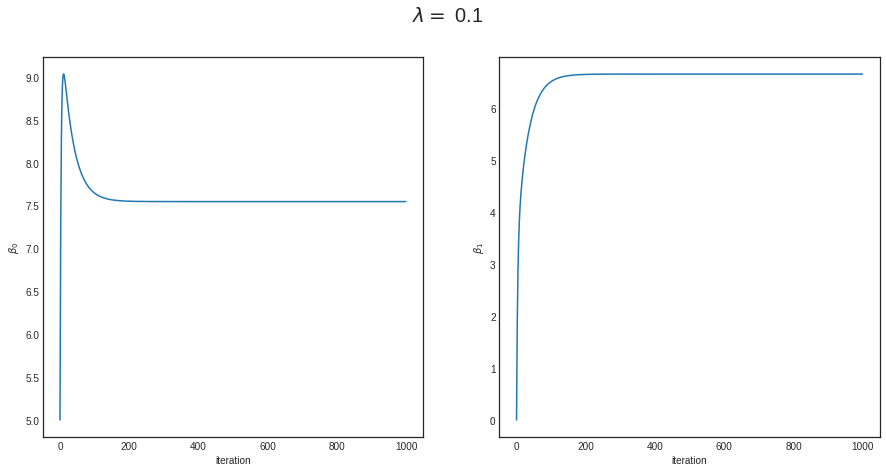

In [148]:
beta_0 = 5
beta_1 = 0.005
lambda_ = 0.1
steps = 1000
beta_0s = []
beta_1s = []
for i in range(steps):
    grad = gradient_ols(beta_0, beta_1, y, X)
    beta_0s.append(beta_0)
    beta_0 = beta_0 - lambda_*grad[0]
    beta_1s.append(beta_1)
    beta_1 = beta_1 - lambda_*grad[1]
    
fig, axs = plt.subplots(1, 2, figsize=(15,7)) # Creating fig with 2 col, 1 rows
axs[0].plot(np.arange(steps), beta_0s)
axs[0].set_ylabel(r'$\beta_0$')
axs[1].plot(np.arange(steps), beta_1s)
axs[1].set_ylabel(r'$\beta_1$')
for ax in axs:
    ax.set_xlabel('iteration')
fig.suptitle(r'$\lambda =$ {}'.format(lambda_), fontsize=20)
plt.show();

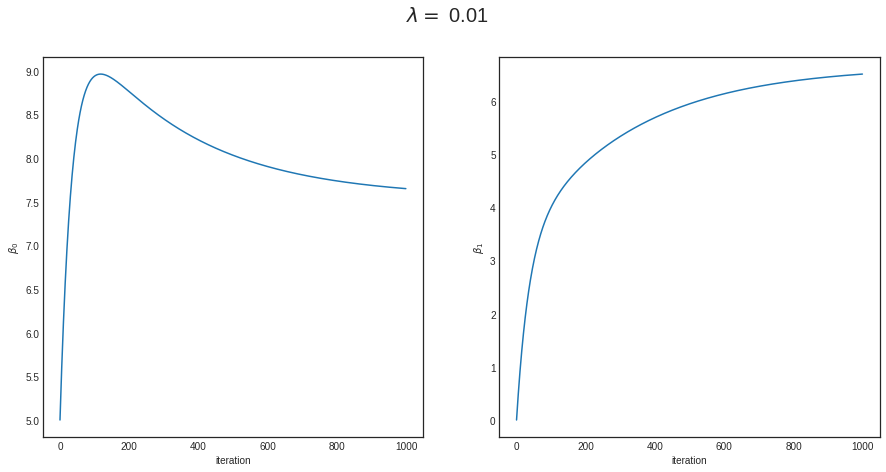

In [150]:
beta_0 = 5
beta_1 = 0.005
lambda_ = 0.01
steps = 1000
beta_0s = []
beta_1s = []
for i in range(steps):
    grad = gradient_ols(beta_0, beta_1, y, X)
    beta_0s.append(beta_0)
    beta_0 = beta_0 - lambda_*grad[0]
    beta_1s.append(beta_1)
    beta_1 = beta_1 - lambda_*grad[1]
    
fig, axs = plt.subplots(1, 2, figsize=(15,7)) # Creating fig with 2 col, 1 rows
axs[0].plot(np.arange(steps), beta_0s)
axs[0].set_ylabel(r'$\beta_0$')
axs[1].plot(np.arange(steps), beta_1s)
axs[1].set_ylabel(r'$\beta_1$')
for ax in axs:
    ax.set_xlabel('iteration')
fig.suptitle(r'$\lambda =$ {}'.format(lambda_), fontsize=20)
plt.show();